In [1]:
import scipy.io as loadmat
import numpy as np
import matplotlib.pyplot as plt


dataname = '_2023_12_01'

data = loadmat.loadmat('data/velocity_field_wo_removing_bubble'+dataname+'.mat')

type(data)

data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'dt', 'res', 'vel', 'xphy', 'yphy'])

In [9]:
# Extract the 'vel' variable from the loaded data
vel = data['vel']
yphy = data['yphy']
print(np.shape(yphy)) 
yphy = yphy.reshape(-1)

# Check and print the structure of 'vel'
print("Type of vel:", type(vel))
print("Shape of vel:", np.shape(vel))

# If vel is a structured array, print the fields
if isinstance(vel, np.ndarray) and vel.dtype.names:
    print("Fields in vel:", vel.dtype.names)

# Print the first element to understand its structure
if len(vel) > 0:
    print("First element in vel:", vel[0])
    if isinstance(vel[0], np.ndarray) and vel[0].dtype.names:
        print("Fields in the first element of vel:", vel[0].dtype.names)

(1, 51)
Type of vel: <class 'numpy.ndarray'>
Shape of vel: (1, 1199)
Fields in vel: ('u', 'v', 'c')
First element in vel: [(array([[-1.34866411e-02, -1.39603321e-02, -1.31589279e-02, ...,
         -2.25832462e-03, -3.82480547e-03,  2.58214958e-04],
        [-3.54641935e-02, -3.44827428e-02, -2.38567247e-02, ...,
         -4.29238135e-03, -1.83295214e-03, -1.97463180e-03],
        [-3.60438761e-02, -3.57166883e-02, -2.70663641e-02, ...,
         -4.23495003e-03, -2.05544159e-03, -5.24784912e-03],
        ...,
        [ 6.11706273e-03,  6.95171009e-03,  4.61146396e-03, ...,
         -2.69910708e-03, -1.93931717e-03, -1.95107099e-03],
        [ 7.62977142e-03,  6.46586147e-03,  5.00262267e-03, ...,
         -9.55277622e-04,  3.01550712e-03, -1.87371583e-04],
        [ 9.12887894e-03,  6.68533079e-03,  4.11636256e-03, ...,
          6.45936451e-05,  2.66691386e-04,  9.11297821e-04]]), array([[-0.03383373, -0.03814112, -0.03952405, ..., -0.0362189 ,
         -0.03301147, -0.02726531],
     

[[ 7.20217364e-04 -3.46466263e-04 -4.53688777e-04 ...  8.32546495e-04
   7.80590536e-04 -1.02852971e-04]
 [ 4.39128861e-04  1.73655686e-04 -2.69391650e-04 ...  2.97316170e-04
  -1.39958997e-04 -2.43845326e-05]
 [ 9.27135861e-04  6.18641841e-04  4.47975650e-04 ... -9.36471263e-05
  -3.63717402e-04 -1.12730630e-04]
 ...
 [ 6.14138930e-03  6.72002337e-03  6.79968486e-03 ... -9.80786122e-04
  -8.13452979e-04 -1.53723752e-04]
 [ 6.41340858e-03  6.95482562e-03  7.34252767e-03 ... -1.26970023e-03
  -4.14475606e-04  1.79986584e-04]
 [ 6.98963083e-03  7.17734224e-03  7.47470150e-03 ... -1.26101031e-03
  -3.70518930e-04 -1.24218621e-04]]


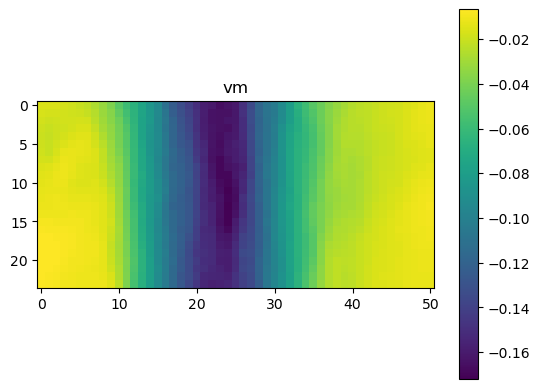

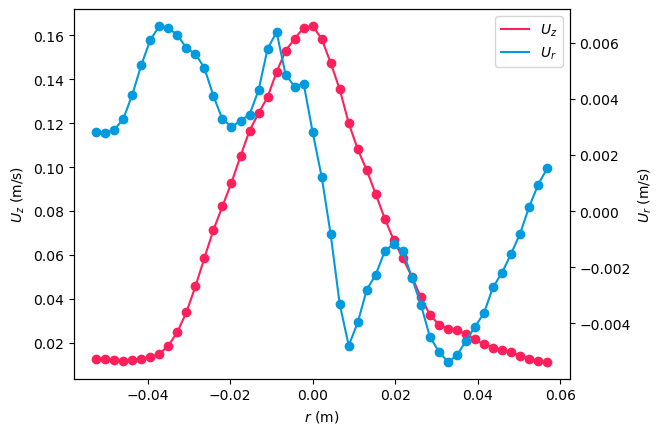

In [13]:
# Extract the 'vel' variable from the loaded data
vel = data['vel'][0]  # Assuming vel is a 1D array of structured elements

N = len(vel)

c_threshold = 0.7

u_list = []
v_list = []

for i in range(N):
    ui = vel[i]['u']
    vi = vel[i]['v']
    ci = vel[i]['c']

    # Check if ui, vi, and ci are not empty
    if ui.size > 0 and vi.size > 0 and ci.size > 0:
        # Remove all data with low correlation
        flag = ci < c_threshold
        ui[flag] = np.nan
        vi[flag] = np.nan

        u_list.append(ui)
        v_list.append(vi)

# Convert lists to three-dimensional arrays
u = np.dstack(u_list) if u_list else np.array([])
v = np.dstack(v_list) if v_list else np.array([])

# Time average
if u.size > 0 and v.size > 0:
    um = np.nanmean(u, axis=2)
    vm = np.nanmean(v, axis=2)
    print(um)

    # Plot vm
    plt.imshow(vm)
    plt.colorbar()
    plt.title("vm")
   
    plt.savefig("figures/Vm"+dataname+".png")
    plt.show()
    plt.close()


    length = np.arange(-np.shape(vm)[1]//2, np.shape(vm)[1]//2, 1) * 1.083e-4

    # Plot the mean of vm and um
    plt.figure()

    Uz = -np.nanmean(vm, axis=0)
    Uzmax_index = np.argmax(Uz)
    Yphy = yphy - yphy[Uzmax_index]
        # First line plot on the primary y-axis
    line1, = plt.plot(Yphy, Uz,color='#ff1f5b', label='Mean of vm')
    plt.scatter(Yphy, -np.nanmean(vm, axis=0), color='#ff1f5b', marker='o')
    plt.ylabel('$U_z$ (m/s)')
    plt.xlabel('$r$ (m)')
    # plt.grid(True)

    # Second line plot on the secondary y-axis
    ax2 = plt.twinx()
    line2, = ax2.plot(Yphy, np.nanmean(um, axis=0), color='#009ade', label='$U_r$')
    plt.scatter(Yphy, np.nanmean(um, axis=0), color='#009ade', marker='o')
    ax2.set_ylabel('$U_r$ (m/s)')

    # Create a single legend for both lines
    plt.legend([line1, line2], ['$U_z$', '$U_r$'])

    #plt.xlim(-0.004, 0.004)
    plt.savefig("figures/mean_vm_um_X_direction"+dataname+".png")

    plt.show()
    plt.close()

else:
    print("No valid data to process.")